In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import math
from keras.layers import Dense
from keras.layers import LSTM,RNN, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## **Import whole data:**

In [3]:
df=pd.read_csv("/content/Brazil (1).csv", engine='python')


## **Choose the country and new cases:**

In [4]:
df=df[df['location']=='Brazil']
df=df[['date','new_cases']]

In [5]:
df

,date,new_cases
6417,2019-12-31,0.0
6418,2020-01-01,0.0
6419,2020-01-02,0.0
6420,2020-01-03,0.0
6421,2020-01-04,0.0
...,...,...
6700,2020-10-09,27750.0
6701,2020-10-10,27444.0
6702,2020-10-11,26749.0
6703,2020-10-12,12345.0


## **Plot Figures:**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


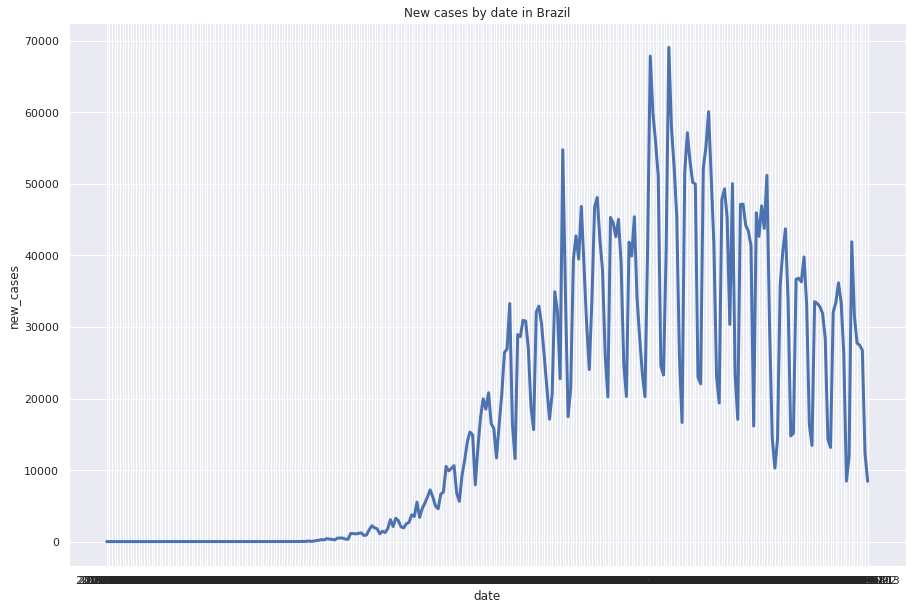

In [6]:
# plt.figure(figsize=(20,15))
# plt.subplot(211)
# plt.plot(df['date'],df['new_cases'])

sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots (figsize=(15,10))
sns.lineplot ('date','new_cases', data=df, linewidth=3)
plt.title ('New cases by date in Brazil')
plt.show()

#plt.figure(figsize=(20,10))
#plt.subplot(212)
#plt.plot(df_['date'],df_['new_deaths'],'r')
#plt.show()


# **Data Preprocessing:**

In [7]:
case_series=df['new_cases'].astype('float32')
case_series=pd.DataFrame(case_series)



In [8]:
case_series=case_series.fillna(0)
case_series

,new_cases
6417,0.0
6418,0.0
6419,0.0
6420,0.0
6421,0.0
...,...
6700,27750.0
6701,27444.0
6702,26749.0
6703,12345.0


In [9]:
import numpy
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
timestep=5
X_case, y_case = create_dataset(case_series, timestep)
# X_death,y_death= create_dataset(death_series,timestep)

In [11]:
train_size=int(len(case_series)*0.85)

In [12]:
x_case_train,x_case_valid=X_case[:train_size,:],X_case[train_size:,:]
y_case_train,y_case_valid=y_case[:train_size],y_case[train_size:]


In [13]:

n_features = 1
x_case_train = x_case_train.reshape((x_case_train.shape[0], x_case_train.shape[1], n_features))

x_case_test=x_case_valid.reshape((x_case_valid.shape[0], x_case_valid.shape[1], n_features))


## **Model preperation:**

In [14]:

model = Sequential()
model.add((LSTM(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
#model.add(Bidirectional(LSTM(20,activation='relu')))
#model.add(Bidirectional(LSTM(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
model.add((LSTM(20,activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_case_train,y_case_train, epochs=600, verbose=2)

Epoch 1/600
8/8 - 0s - loss: 498482080.0000
Epoch 2/600
8/8 - 0s - loss: 399847424.0000
Epoch 3/600
8/8 - 0s - loss: 252297696.0000
Epoch 4/600
8/8 - 0s - loss: 114147144.0000
Epoch 5/600
8/8 - 0s - loss: 103471064.0000
Epoch 6/600
8/8 - 0s - loss: 98283472.0000
Epoch 7/600
8/8 - 0s - loss: 140818688.0000
Epoch 8/600
8/8 - 0s - loss: 150577248.0000
Epoch 9/600
8/8 - 0s - loss: 131737104.0000
Epoch 10/600
8/8 - 0s - loss: 109284904.0000
Epoch 11/600
8/8 - 0s - loss: 131012456.0000
Epoch 12/600
8/8 - 0s - loss: 145486864.0000
Epoch 13/600
8/8 - 0s - loss: 127466696.0000
Epoch 14/600
8/8 - 0s - loss: 118292664.0000
Epoch 15/600
8/8 - 0s - loss: 114601488.0000
Epoch 16/600
8/8 - 0s - loss: 114153144.0000
Epoch 17/600
8/8 - 0s - loss: 106012640.0000
Epoch 18/600
8/8 - 0s - loss: 105339536.0000
Epoch 19/600
8/8 - 0s - loss: 102850752.0000
Epoch 20/600
8/8 - 0s - loss: 106047016.0000
Epoch 21/600
8/8 - 0s - loss: 142178848.0000
Epoch 22/600
8/8 - 0s - loss: 115043728.0000
Epoch 23/600
8/8 - 0

# **Check validation data:**

In [15]:

case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[train_size-15:(train_size+5-15)])

x_input=numpy.array(x_input)



In [16]:
x_input

array([41576., 23101., 19373., 47784., 49298.], dtype=float32)

In [17]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<(len(case_series)-train_size)):
    
    if(len(temp_input)>5):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[38737.246]
1 day input [23101.    19373.    47784.    49298.    38737.246]
[23101.    19373.    47784.    49298.    38737.246]
[[[23101.   ]
  [19373.   ]
  [47784.   ]
  [49298.   ]
  [38737.246]]]
1 day output [[36245.066]]
2 day input [19373.    47784.    49298.    38737.246 36245.066]
[19373.    47784.    49298.    38737.246 36245.066]
[[[19373.   ]
  [47784.   ]
  [49298.   ]
  [38737.246]
  [36245.066]]]
2 day output [[36275.18]]
3 day input [47784.    49298.    38737.246 36245.066 36275.18 ]
[47784.    49298.    38737.246 36245.066 36275.18 ]
[[[47784.   ]
  [49298.   ]
  [38737.246]
  [36245.066]
  [36275.18 ]]]
3 day output [[38680.418]]
4 day input [49298.    38737.246 36245.066 36275.18  38680.418]
[49298.    38737.246 36245.066 36275.18  38680.418]
[[[49298.   ]
  [38737.246]
  [36245.066]
  [36275.18 ]
  [38680.418]]]
4 day output [[44036.44]]
5 day input [38737.246 36245.066 36275.18  38680.418 44036.44 ]
[38737.246 36245.066 36275.18  38680.418 44036.44 ]
[[[38737.246]


In [18]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(train_size,train_size+(len(case_series)-train_size))


In [19]:
lst_output=numpy.array(lst_output)
lst_output

array([38737.246 , 36245.066 , 36275.18  , 38680.418 , 44036.44  ,
       25432.06  , 29724.291 , 28417.523 , 30545.205 , 32242.01  ,
       22344.238 , 22956.695 , 21900.875 , 25634.049 , 32105.81  ,
       16072.286 , 19607.568 , 16138.661 , 19233.992 , 20393.666 ,
       14200.751 , 15582.147 , 13817.138 , 15433.84  , 19733.617 ,
       10519.372 , 12162.051 ,  9978.308 , 11586.443 , 12616.143 ,
        9203.042 ,  9498.68  ,  8584.138 ,  8991.613 , 12072.508 ,
        8888.492 ,  6160.5493,  7875.955 ,  9440.536 , 10800.28  ,
        5810.516 ,  7548.9824,  5576.0625,  6734.189 ], dtype=float32)

No handles with labels found to put in legend.


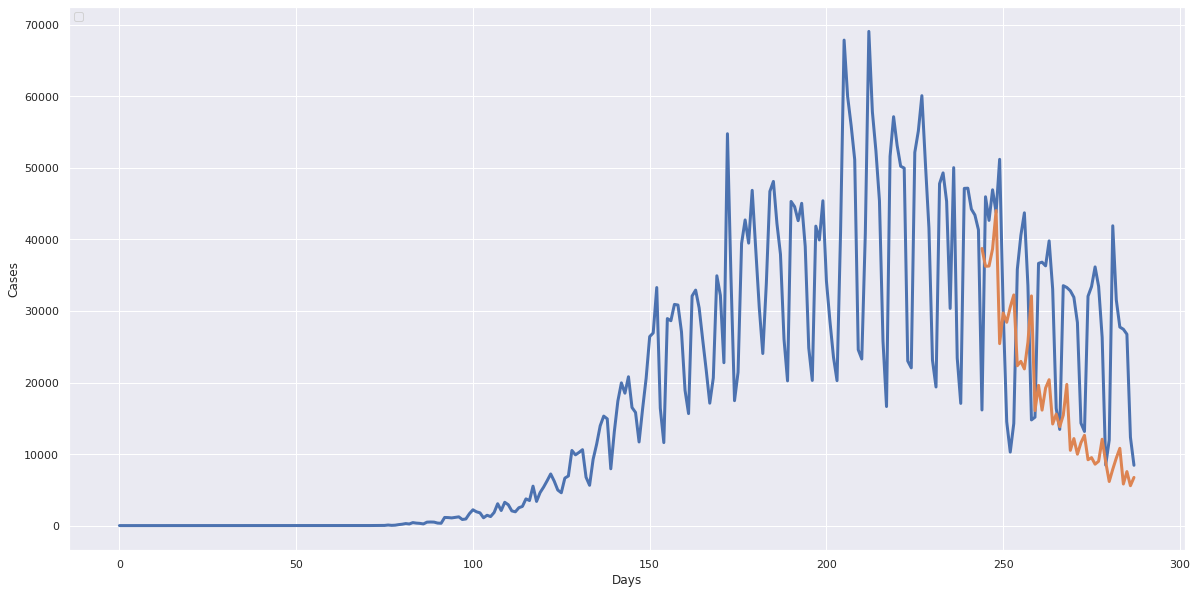

In [20]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting:

---



---



In [21]:
case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[-timestep:])
x_input=numpy.array(x_input)



In [22]:

x_input

array([27750., 27444., 26749., 12345.,  8426.], dtype=float32)

In [23]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<40):
    
    if(len(temp_input)>5):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[18795.094]
1 day input [27444.    26749.    12345.     8426.    18795.094]
[27444.    26749.    12345.     8426.    18795.094]
[[[27444.   ]
  [26749.   ]
  [12345.   ]
  [ 8426.   ]
  [18795.094]]]
1 day output [[14739.345]]
2 day input [26749.    12345.     8426.    18795.094 14739.345]
[26749.    12345.     8426.    18795.094 14739.345]
[[[26749.   ]
  [12345.   ]
  [ 8426.   ]
  [18795.094]
  [14739.345]]]
2 day output [[19723.623]]
3 day input [12345.     8426.    18795.094 14739.345 19723.623]
[12345.     8426.    18795.094 14739.345 19723.623]
[[[12345.   ]
  [ 8426.   ]
  [18795.094]
  [14739.345]
  [19723.623]]]
3 day output [[13011.685]]
4 day input [ 8426.    18795.094 14739.345 19723.623 13011.685]
[ 8426.    18795.094 14739.345 19723.623 13011.685]
[[[ 8426.   ]
  [18795.094]
  [14739.345]
  [19723.623]
  [13011.685]]]
4 day output [[13947.346]]
5 day input [18795.094 14739.345 19723.623 13011.685 13947.346]
[18795.094 14739.345 19723.623 13011.685 13947.346]
[[[18795.094

In [24]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(len(case_series)-1,len(case_series)+39)


No handles with labels found to put in legend.


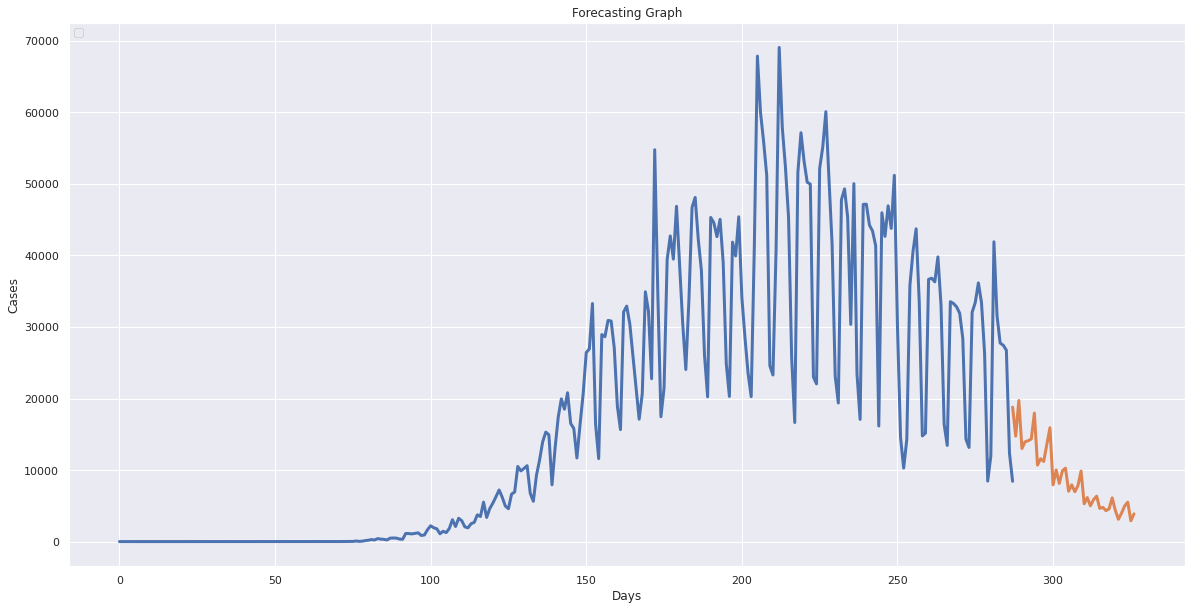

In [27]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.title('Forecasting Graph')
plt.show()